# **Projekt 1**

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
import sklearn 
from sklearn.preprocessing import StandardScaler, Normalizer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 

# Wczytanie i wstępna analiza danych

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


W kolumnie "native-country" przeważają United States dlatego usuwam ją

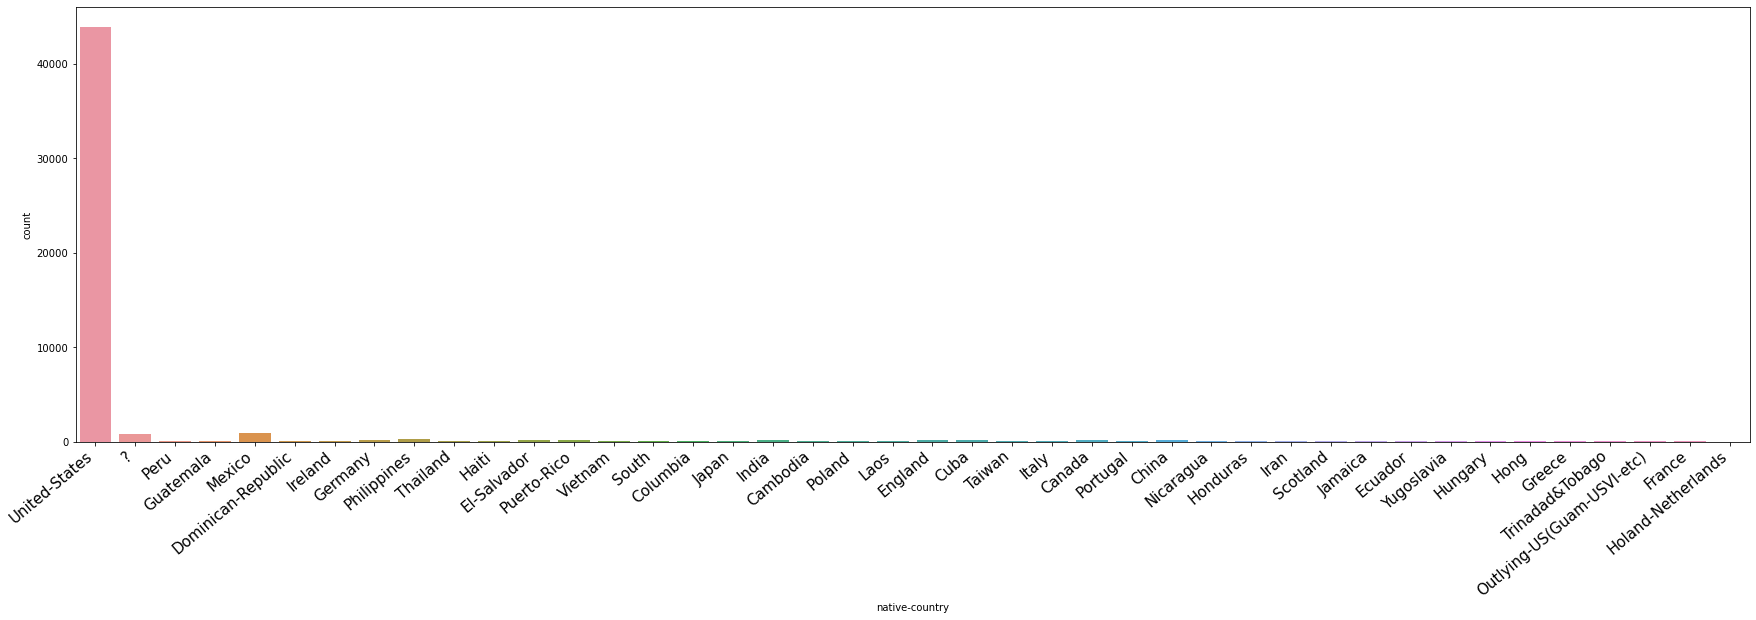

In [4]:
plt.figure(figsize=(30,8))
plot = sns.countplot(x="native-country", data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right",fontsize=15)
plt.show()

In [5]:
df = df.drop(['native-country'], axis=1)

# Mapowanie brakujących danych na najczęściej występujące

In [6]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
df = df.replace('?',np.nan)

In [7]:
# checking for columns with nan values
df.isna().any()

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
income             False
dtype: bool

In [8]:
# replacing missing values with most frequent values
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['workclass'] = imp.fit_transform(df['workclass'].values.reshape(-1,1))
df['occupation'] = imp.fit_transform(df['occupation'].values.reshape(-1,1))
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,0


# Kilka dodatkowych informacji

In [9]:
income = df["income"]
income.value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  income           48842 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 5.2+ MB


In [11]:
df.shape

(48842, 14)

In [12]:
# more detailed info about data
for i in df.columns.tolist():
    print(i,':')
    print(df[i].value_counts())
    print('')

age :
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

workclass :
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

fnlwgt :
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
131379     1
160061     1
334224     1
45381      1
208174     1
Name: fnlwgt, Length: 28523, dtype: int64

education :
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: in

# Usunięcie niepotrzebnych kolumn

In [13]:
df = df.drop(columns=['fnlwgt', 'capital-gain','capital-loss','educational-num'])

**Proporcje klas dla parametru 'income'**

<AxesSubplot:xlabel='income', ylabel='count'>

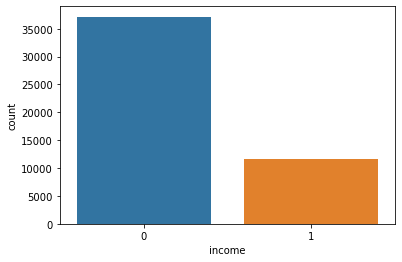

In [14]:
sns.countplot(x="income", data=df)

# Mapowanie danych na wartości liczbowe

In [15]:
data = df.drop('income',axis=1)
obj_df = data.select_dtypes(include=['object']).copy()
ord_enc = OrdinalEncoder()

for i in obj_df:
    data[i] = ord_enc.fit_transform(obj_df[[i]])
    
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week
0,25,3.0,1.0,4.0,6.0,3.0,2.0,1.0,40
1,38,3.0,11.0,2.0,4.0,0.0,4.0,1.0,50
2,28,1.0,7.0,2.0,10.0,0.0,4.0,1.0,40
3,44,3.0,15.0,2.0,6.0,0.0,2.0,1.0,40
4,18,3.0,15.0,4.0,9.0,3.0,4.0,0.0,30


# Wybór zboru testowego i treningowego

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data,income, train_size = 0.7, test_size = 0.3)

# Random Forest Classification - algorytm uczenia maszynowego

In [17]:
model1 = RandomForestClassifier()

model2 = RandomForestClassifier(n_estimators = 50, criterion = "entropy", max_depth = 20, 
                               min_samples_split = 2, min_samples_leaf = 3, min_weight_fraction_leaf = 0.0,
                               max_features = "auto")

model3 = RandomForestClassifier(n_estimators = 100, criterion = "entropy", max_depth = 20, 
                               min_samples_split = 2, min_samples_leaf = 3,
                               max_features = "auto")

model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
print("Accuracy on test set (model1): ", model1.score(X_test,y_test)*100,"%")
print("Accuracy on traing set (model1) : ", model1.score(X_train,y_train)*100,"%")

model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
print("Accuracy on test set (model2): ", model2.score(X_test,y_test)*100,"%")
print("Accuracy on traing set (model2) : ", model2.score(X_train,y_train)*100,"%")

model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
print("Accuracy on test set (model3): ", model3.score(X_test,y_test)*100,"%")
print("Accuracy on traing set (model3) : ", model3.score(X_train,y_train)*100,"%")

Accuracy on test set (model1):  81.61468641233877 %
Accuracy on traing set (model1) :  96.5398227500073 %
Accuracy on test set (model2):  83.83266225346345 %
Accuracy on traing set (model2) :  88.3968527889087 %
Accuracy on test set (model3):  83.92138128710845 %
Accuracy on traing set (model3) :  88.57234783117377 %


**Macierz pomyłek**

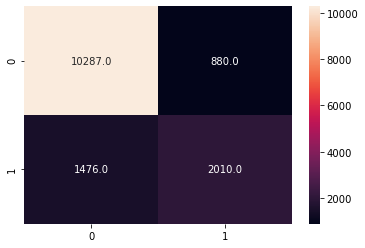

In [18]:
conf=confusion_matrix(y_true=y_test,y_pred=y_pred3)

sns.heatmap(conf,annot=True, fmt=".1f")
plt.show()

# Walidacja krzyżowa na siatce (grid search) do znalezienia optymalnych parametrów

In [19]:
model = RandomForestClassifier()

kf = KFold(n_splits=5)

params = {'max_features': [1,30,60],
          'max_depth': [15,20,25], 'criterion': ["entropy","gini"]}

grid=GridSearchCV(estimator=model, param_grid=params, cv=kf, scoring = 'accuracy')
gres=grid.fit(X_train,y_train)
print("Best",gres.best_score_)
print("params",gres.best_params_)

Best 0.8371114271942964
params {'criterion': 'entropy', 'max_depth': 15, 'max_features': 3}


**Random Forest Classification dla wyliczonych parametrów:**

In [20]:
model = RandomForestClassifier(n_estimators= 100, max_features = 3,criterion = 'entropy', max_depth = 15)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy on test set: ", model.score(X_test,y_test)*100,"%")
print("Accuracy on traing set: ", model.score(X_train,y_train)*100,"%")

Accuracy on test set:  83.93503036920768 %
Accuracy on traing set:  89.55512006785808 %


**Macierz pomyłek**

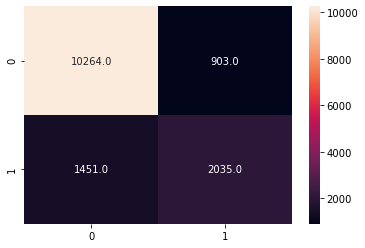

In [21]:
conf=confusion_matrix(y_true=y_test,y_pred=y_pred)

sns.heatmap(conf,annot=True, fmt=".1f")
plt.show()


# Zbadanie wplywu normalizacji, standaryzacji i PCA

In [22]:
#PCA
X_scaled = StandardScaler().fit_transform(X_train)

pca = PCA()

pipe = Pipeline(steps=[('scaler', Normalizer()) , ('pca', PCA()), ('clf', RandomForestClassifier()) ])

params_grid = dict(scaler=['passthrough', Normalizer(), StandardScaler()], clf__n_estimators = [25,50,100,125],
                    clf__n_jobs = [-1], clf__max_features = [1,2,3,4,5], pca__n_components = [1,2,3,4])


gridSearch = GridSearchCV(estimator=pipe, param_grid=params_grid, n_jobs = -1)
gridSearch.fit(X_train, y_train)

print("Best",gridSearch.best_score_)
print("params",gridSearch.best_params_)

Best 0.7976249612685444
params {'clf__max_features': 1, 'clf__n_estimators': 100, 'clf__n_jobs': -1, 'pca__n_components': 4, 'scaler': 'passthrough'}
